## What are the Key...... differentiators between the top 5% movies cmpares to the average movie when considerng overall rating 

### issue tree

Hypothesis

Elements of an effective ghost deck:
The Synthesis:
● Is also known as an executive summary
● Addresses the “so what?” to your analyses
● Includes a succinct recommendation and proposed next steps

Logical Train of Thought:
● Follows clear logic from one analysis to another
● Includes headings that read by themselves

Caveats:
● Includes a call out to the limitations and biases of the analyses, e.g., biases that affect the final recommendation

In [1]:
%pylab inline
from scipy import stats
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('movies_metadata.csv')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Shmuel Naaman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [2]:
df.genres.head()

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [51]:
df['overview'] .head(2)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
Name: overview, dtype: object

In [4]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [5]:
print(df[['original_title', 'revenue', 'budget', 'production_companies','genres', 'release_date','runtime']].info())

# select only the relevant columns and choose only movies with revenue larger than 0
df1 = df[df['revenue']>10][['original_title', 'revenue', 'budget', 'production_companies', 'genres', 'release_date', 'runtime']]
 
# convert 'budget' to numeric 
df1['budget'] = df1[pd.to_numeric(df1['budget'], errors='coerce').notnull()]['budget']
df1['budget'] = pd.to_numeric(df1['budget'])
 
# choose only movies with budget larger than 1M
df1 = df1[df1['budget']>1000000][['original_title', 'revenue', 'budget', 'production_companies', 'genres', 'release_date', 'runtime']]

df1 = df1.reset_index(drop=True)

# Convert date to month year 
df1['month'] = pd.to_datetime(df1['release_date'], format = '%Y-%m-%d', errors = 'coerce').dt.month
df1['year'] = pd.to_datetime(df1['release_date'], format = '%Y-%m-%d', errors = 'coerce').dt.year 
df1 = df1.drop(['release_date'], axis=1)

# Convert revenue budget to ratio
df1['rev_bud'] = df1['revenue']/df1['budget']
df1 = df1.drop(['revenue', 'budget' ], axis = 1) 

# convert 'genres' to list 
df1['genres'] = df1['genres'].apply(ast.literal_eval)
df1['genres'] = df1['genres'].fillna("[]").apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
    
# convert 'production_companies' to list 
df1['production_companies'] = df1['production_companies'].apply(ast.literal_eval)
df1['production_companies'] = df1['production_companies'].fillna("[]").apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# seperate the list in 'production_companies' into different row   company df 
a = df1.production_companies.apply(pd.Series)  
a = a.merge(df1.drop(["production_companies"], axis = 1), right_index = True, left_index = True) 
df_p = pd.melt(a, id_vars = ['original_title', 'genres', 'rev_bud', 'runtime', 'month', 'year'], value_name = "production_companie")\
    .drop("variable", axis = 1) \
    .dropna()

# seperate the list in 'genre' into different row genre df
a = df1.genres.apply(pd.Series)  
a = a.merge(df1.drop(['genres'], axis = 1), right_index = True, left_index = True) 
df_g = pd.melt(a, id_vars = ['original_title', 'production_companies', 'rev_bud', 'runtime', 'month', 'year'], value_name = "genre")\
    .drop("variable", axis = 1) \
    .dropna()
    
# seperate the list in 'genre' into different row     population df
a = df_p.genres.apply(pd.Series)  
a = a.merge(df_p.drop(['genres'], axis = 1), right_index = True, left_index = True) 
df1 = pd.melt(a, id_vars = ['original_title', 'production_companie', 'rev_bud', 'runtime', 'month', 'year'], value_name = "genre")\
    .drop("variable", axis = 1) \
    .dropna()

#print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 7 columns):
original_title          45466 non-null object
revenue                 45460 non-null float64
budget                  45466 non-null object
production_companies    45463 non-null object
genres                  45466 non-null object
release_date            45379 non-null object
runtime                 45203 non-null float64
dtypes: float64(2), object(5)
memory usage: 2.4+ MB
None


In [35]:
a['genres']= df['genres'].apply(ast.literal_eval) 
#a['genres'] = a['genres'].fillna("[]").apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
a['genres'].head()

0    [{'name': 'Animation', 'id': 16}, {'name': 'Co...
1    [{'name': 'Adventure', 'id': 12}, {'name': 'Fa...
2    [{'name': 'Romance', 'id': 10749}, {'name': 'C...
3    [{'name': 'Comedy', 'id': 35}, {'name': 'Drama...
4                       [{'name': 'Comedy', 'id': 35}]
Name: genres, dtype: object

In [71]:
df['gen_l']=df['genres'].apply(ast.literal_eval).apply(lambda x:   [i.get('name')  for i in x]  )  
pd.get_dummies(pd.Series(a['gen_l']).apply(pd.Series).stack()).sum(level=0)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [67]:
pd.get_dummies(pd.Series(a['gen_l']).apply(pd.Series).stack()).sum(level=0)


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
list_gen =[]
for i in a['genres'][0] :
    list_gen.append(i.get('name'))
list_gen    

['Animation', 'Comedy', 'Family']

In [37]:
df_genre = pd.DataFrame(columns = ['genre', 'cgenres', 'budget', 'revenue', 'day', 'month', 'year'])
def dataPrep(row):
    global df_genre
    d = {}
    genres = np.array([g['name'] for g in eval(row['genres'])])
    n = genres.size
    d['budget'] = [row['budget']]*n
    d['revenue'] = [row['revenue']]*n
    d.update(zip(('year', 'month', 'day'), map(int, row['release_date'].split('-'))))
    d['genre'], d['cgenres'] = [], []
    for genre in genres:
        d['genre'].append(genre)
        d['cgenres'].append(genres[genres != genre])
    df_genre = df_genre.append(pd.DataFrame(d), ignore_index=True, sort=True)

df1.apply(dataPrep, axis=1)
#df_genre = df1[['genre', 'budget', 'revenue', 'day', 'month', 'year', 'cgenres']]
#df_genre = df_genre.infer_objects()

#df1.genres = df1.genres.str.split('|')
#df1 = explode(df1, ['genres'])
df1.head()

TypeError: ('eval() arg 1 must be a string, bytes or code object', 'occurred at index 0')

In [3]:
df1 = df[df['revenue']>10][['original_title', 'revenue', 'budget', 'production_companies', 'genres', 'release_date', 'runtime']]
 
# convert 'budget' to numeric 
df1['budget'] = df1[pd.to_numeric(df1['budget'], errors='coerce').notnull()]['budget']
df1['budget'] = pd.to_numeric(df1['budget'])
 
# choose only movies with budget larger than 1M
df1 = df1[df1['budget']>1000000][['original_title', 'revenue', 'budget', 'production_companies', 'genres', 'release_date', 'runtime']]

df1 = df1.reset_index(drop=True)

# Convert date to month year 
df1['month'] = pd.to_datetime(df1['release_date'], format = '%Y-%m-%d', errors = 'coerce').dt.month
df1['year'] = pd.to_datetime(df1['release_date'], format = '%Y-%m-%d', errors = 'coerce').dt.year 
df1 = df1.drop(['release_date'], axis=1)

# Convert revenue budget to ratio
df1['rev_bud'] = df1['revenue']/df1['budget']
df1 = df1.drop(['revenue', 'budget' ], axis = 1) 

# convert 'genres' to list 
df1['genres'] = df1['genres'].apply(ast.literal_eval)
df1['genres'] = df1['genres'].fillna("[]").apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
    

In [5]:
df1['genres'].head()
a = df1.genres.apply(pd.Series)  
a = a.merge(df1.drop(['genres'], axis = 1), right_index = True, left_index = True) 
a

,0,1,2,3,4,5,6,7,original_title,production_companies,runtime,month,year,rev_bud
0,Animation,Comedy,Family,NaN,NaN,NaN,NaN,NaN,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]",81.0,10,1995,12.451801
1,Adventure,Fantasy,Family,NaN,NaN,NaN,NaN,NaN,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",104.0,12,1995,4.043035
2,Comedy,Drama,Romance,NaN,NaN,NaN,NaN,NaN,Waiting to Exhale,[{'name': 'Twentieth Century Fox Film Corporat...,127.0,12,1995,5.090760
3,Action,Crime,Drama,Thriller,NaN,NaN,NaN,NaN,Heat,"[{'name': 'Regency Enterprises', 'id': 508}, {...",170.0,12,1995,3.123947
4,Action,Adventure,Thriller,NaN,NaN,NaN,NaN,NaN,Sudden Death,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",106.0,12,1995,1.838576
5,Adventure,Action,Thriller,NaN,NaN,NaN,NaN,NaN,GoldenEye,"[{'name': 'United Artists', 'id': 60}, {'name'...",130.0,11,1995,6.072311
6,Comedy,Drama,Romance,NaN,NaN,NaN,NaN,NaN,The American President,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",106.0,11,1995,1.739992
7,History,Drama,NaN,NaN,NaN,NaN,NaN,NaN,Nixon,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...",192.0,12,1995,0.310949
8,Action,Adventure,NaN,NaN,NaN,NaN,NaN,NaN,Cutthroat Island,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...",119.0,12,1995,0.102218
9,Drama,Crime,NaN,NaN,NaN,NaN,NaN,NaN,Casino,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",178.0,11,1995,2.232930


## Hypothesis : production company that produce the top 10%  revenue/budget ratio for more than 3 genres show average higher revenue/budget ratio than the population of all other production companies.   
#### Identify production companies that produce the top 10%  revenue/budget ratio for more than 3 genres.   
#### What is the average and distribution revenue/budget ratio for the top production companies?
#### What is the population average and distribution revenue/budget ratio?

### Identify the companies that appears in the top 10%  revenue/budget ratio for more than 5 genres 

In [6]:
thisdict = {}
Lst_gen = df_g.groupby(['genre'] )['rev_bud'] .quantile(q=0.9)
for i  in Lst_gen.index :
    mylist = set (df1[(df1['rev_bud']>Lst_gen[i]) & (df1['genre']==i) &(df1['year']>2015)]['production_companie'])
    for item in mylist:
        if item in thisdict:
            thisdict.update({item : thisdict.get(item) +1})
        else:
            thisdict.update({item : 1})
 
        
top_vom = dict((k, v) for k, v in thisdict.items() if v > 3) 

,rev_bud
count,1.298100e+04
mean,3.577173e+00
std,7.354060e+00
min,5.217391e-07
25%,7.880168e-01
50%,1.974333e+00
75%,3.913333e+00
max,1.906667e+02


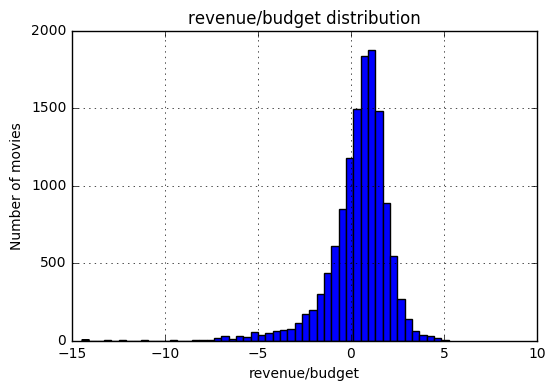

In [30]:
 
ax =  log (df_g['rev_bud']).hist( bins=50) 
ax.set_ylabel('Number of movies')
ax.set_xlabel('revenue/budget')
ax.set_title('revenue/budget distribution')
pd.DataFrame(df_g['rev_bud'].describe())

,runtime
count,12981.000000
mean,111.126801
std,22.067297
min,0.000000
25%,96.000000
50%,107.000000
75%,121.000000
max,338.000000


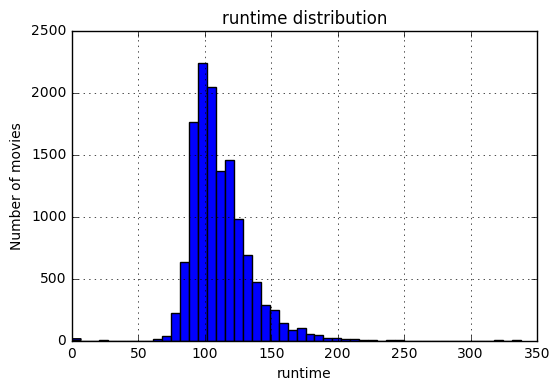

In [45]:
ax =   (df_g['runtime']).hist( bins=50) 
ax.set_ylabel('Number of movies')
ax.set_xlabel('runtime')
ax.set_title('runtime distribution')
pd.DataFrame(df_g['runtime'].describe())

genre
Action             1363
Adventure           932
Animation           282
Comedy             1700
Crime               807
Documentary          32
Drama              2327
Family              519
Fantasy             490
Foreign              21
History             224
Horror              504
Music               175
Mystery             416
Romance             897
Science Fiction     596
TV Movie              1
Thriller           1418
War                 193
Western              84
Name: rev_bud, dtype: int64

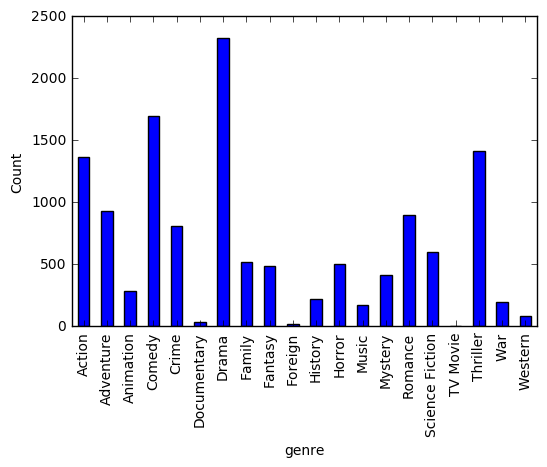

In [39]:
df_g.groupby([ 'genre'])['rev_bud'].count().plot(kind='bar').set_ylabel('Count')
df_g.groupby(['genre' ])['rev_bud'].count()

genre
Action             4513
Adventure          3006
Animation           777
Comedy             4540
Crime              2661
Documentary          84
Drama              7193
Family             1400
Fantasy            1637
Foreign              27
History             725
Horror             1565
Music               450
Mystery            1312
Romance            2379
Science Fiction    2016
TV Movie              3
Thriller           4796
War                 650
Western             225
Name: rev_bud, dtype: int64

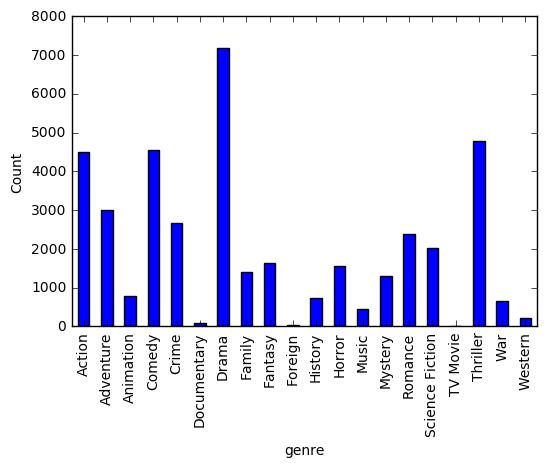

In [50]:
df1.groupby([ 'genre'])['rev_bud'].count().plot(kind='bar').set_ylabel('Count')
df1.groupby(['genre' ])['rev_bud'].count()

month
1      758
2      880
3     1015
4      930
5      979
6     1188
7     1099
8     1146
9     1409
10    1172
11    1042
12    1363
Name: rev_bud, dtype: int64

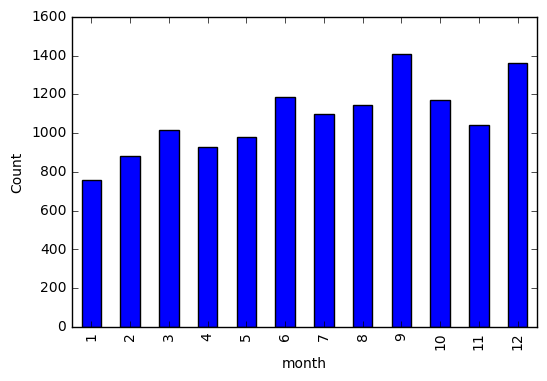

In [40]:
df_g.groupby([ 'month'])['rev_bud'].count().plot(kind='bar').set_ylabel('Count')
df_g.groupby(['month' ])['rev_bud'].count()

In [43]:
#df_p.groupby([ 'production_companie'])['rev_bud'].count().plot(kind='bar').set_ylabel('Count')
df_p.groupby(['production_companie' ])['rev_bud'].count().describe()

count    5007.000000
mean        2.998203
std        12.457270
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       404.000000
Name: rev_bud, dtype: float64

In [7]:
top_vom
pd.DataFrame.from_dict(top_vom, orient='index')
 

,0
Reliance Entertainment,4
Thunder Road Pictures,4
Walden Media,4
Impostor Pictures,4
Star Thrower Entertainment,4
Pariah Entertainment Group,4
Beijing Enlight Pictures,4
Blumhouse Productions,4
Fuji Television Network,4
Amblin Entertainment,4


### Agregate the rev_bud for the top 10% companies

In [8]:
df_top = pd.DataFrame(columns=[['rev_bud','production_companie']]) 

for i  in top_vom:
    df_top=df_top.append(df1[df1['production_companie']==i][['rev_bud','production_companie','genre']])
    
df_top.describe()  
df_top['category']='Top 10%'
df1['category']= 'Population'
df_top=df_top.append(df1[['genre','production_companie','rev_bud','category']])

production_companie
Acacia Filmed Entertainment                 4
Amblin Entertainment                      171
Arka Media Works                            8
Beijing Enlight Pictures                    7
Black Label Media                          11
Blumhouse Productions                      50
China Film Group                           11
Dentsu                                     40
Fuji Television Network                    22
Gilbert Films                               7
Illumination Entertainment                 26
Impostor Pictures                           4
Marc Platt Productions                     38
Marvel Entertainment                       27
Original Pictures                           8
Pariah                                      6
Pariah Entertainment Group                  9
Reliance Entertainment                     43
Screen Gems                               104
Star Thrower Entertainment                  4
Summit Entertainment                      165
TSG Entertainm

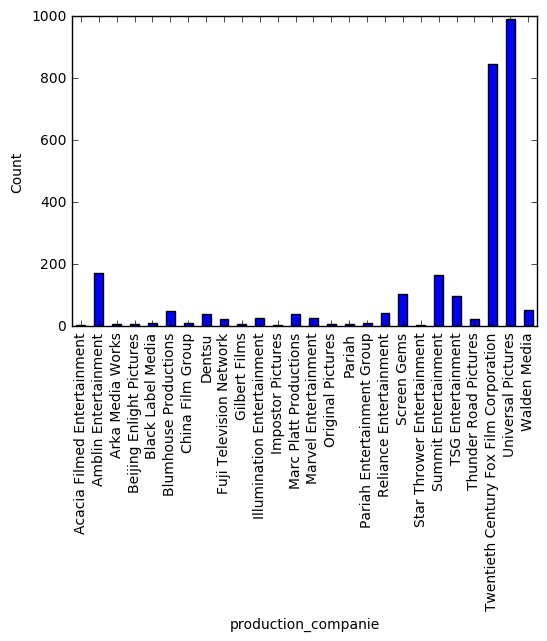

In [49]:
df_top[df_top['category']=='Top 10%'].groupby([ 'production_companie'])['rev_bud'].count().plot(kind='bar').set_ylabel('Count')
df_top[df_top['category']=='Top 10%'].groupby(['production_companie' ])['rev_bud'].count() 

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Population,39959.0,3.294136,6.387666,5.217391e-07,0.786526,1.899343,3.662501,190.666667
Top 10%,2775.0,5.034221,8.250616,3.321071e-03,1.399813,2.800861,5.204254,94.076932


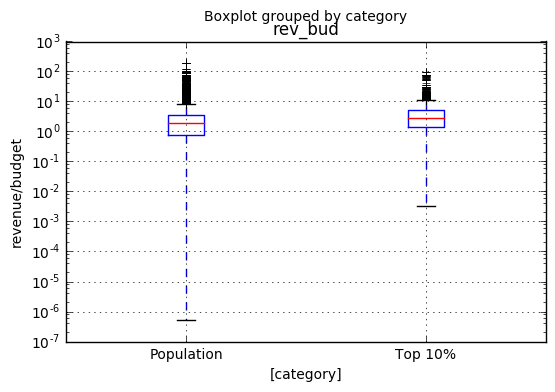

In [9]:
ax = df_top.boxplot(column=['rev_bud'],by = ['category']).set_yscale('log')
plt.ylabel('revenue/budget')

pd.DataFrame(df_top.groupby( ['category'])['rev_bud'].describe())


In [14]:
from scipy import stats
rvs1 = df_top[df_top['category']=='Population']['rev_bud']
rvs2 = df_top[df_top['category']=='Top 10%']['rev_bud']
stats.ttest_ind(rvs1,rvs2)


Ttest_indResult(statistic=-13.584929160894486, pvalue=6.0144195091141227e-42)

## Hypothesis : The average Runtime for  movies in the top 10%  revenue/budget ratio is different than the population average Runtime.
### What is the  average Runtime for  movies in the top 10%  revenue/budget ratio?
### Does the average Runtime for  top 10%  revenue/budget ratio in the last 5 years is different than the same average in the previous 5 years?
### Does the average Runtime for  top 10%  revenue/budget ratio in the last 5 years is longer or shorter than population average Runtime?   


In [10]:
thisdict = {}
Lst_gen = df_g.groupby(['genre'] )['rev_bud'] .quantile(q=0.9)
for i  in Lst_gen.index :
    mylist = set (df1[(df1['rev_bud']>Lst_gen[i]) & (df1['genre']==i) &(df1['year']>2012)]['production_companie'])
    for item in mylist:
        if item in thisdict:
            thisdict.update({item : thisdict.get(item) +1})
        else:
            thisdict.update({item : 1})
 
        
top_vom = dict((k, v) for k, v in thisdict.items() if v > 3) 

In [11]:
df_run = pd.DataFrame(columns=[['runtime','production_companie']]) 

for i  in top_vom:
    df_run=df_run.append(df1[df1['production_companie']==i][['runtime','production_companie','genre']])
    
df_run.describe()  
df_run['category']='Top 10%'
df1['category']= 'Population'
df_run=df_run.append(df1[['genre','production_companie','runtime','category']])

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Population,39959.0,111.798569,20.860262,0.0,97.0,108.0,122.0,338.0
Top 10%,5907.0,112.154562,20.451001,63.0,97.0,109.0,124.0,248.0


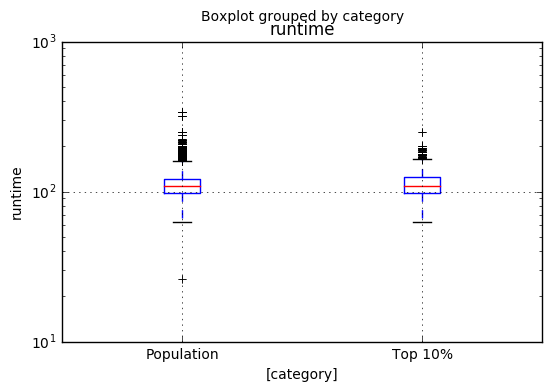

In [12]:
 

ax = df_run.boxplot(column=['runtime'],by = ['category']).set_yscale('log')
plt.ylabel('runtime')

pd.DataFrame(df_run.groupby( ['category'])['runtime'].describe())

In [15]:
rvs1 = df_run[df_run['category']=='Top 10%']['runtime']
rvs2 = df_run[df_run['category']=='Population']['runtime']
stats.ttest_ind(rvs1,rvs2)


Ttest_indResult(statistic=1.2273184164361515, pvalue=0.21970923587283336)

In [16]:
thisdict = {}
Lst_gen = df_g.groupby(['genre'] )['rev_bud'] .quantile(q=0.9)
for i  in Lst_gen.index :
    mylist = set (df1[(df1['rev_bud']>Lst_gen[i]) & (df1['genre']==i) &(df1['year']<2012)&(df1['year']>2007)]['production_companie'])
    for item in mylist:
        if item in thisdict:
            thisdict.update({item : thisdict.get(item) +1})
        else:
            thisdict.update({item : 1})
 
        
top_vom = dict((k, v) for k, v in thisdict.items() if v > 3) 

In [17]:
df_run_5 = pd.DataFrame(columns=[['runtime','production_companie']]) 

for i  in top_vom:
    df_run_5=df_run_5.append(df1[df1['production_companie']==i][['runtime','production_companie','genre']])
    
df_run_5.describe()  
df_run_5['category']='Top 10% pre 5'
 
df_run=df_run.append(df_run_5[['genre','production_companie','runtime','category']])

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Population,39959.0,111.798569,20.860262,0.0,97.0,108.0,122.0,338.0
Top 10%,5907.0,112.154562,20.451001,63.0,97.0,109.0,124.0,248.0
Top 10% pre 5,5258.0,113.983073,21.676682,69.0,99.0,110.0,125.0,338.0


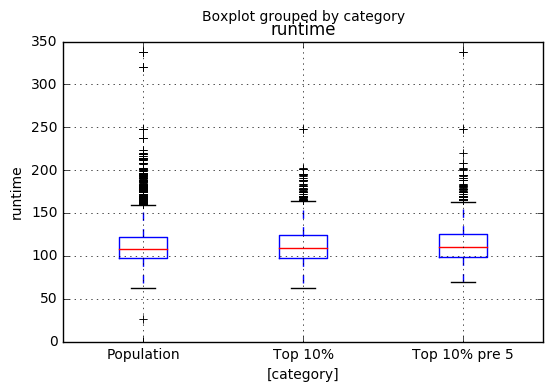

In [18]:

ax = df_run.boxplot(column=['runtime'],by = ['category']) 
plt.ylabel('runtime')

pd.DataFrame(df_run.groupby( ['category'])['runtime'].describe())

In [19]:
rvs1 = df_run[df_run['category']=='Top 10%']['runtime']
rvs2 = df_run[df_run['category']=='Top 10% pre 5']['runtime']
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=-4.5843304290478235, pvalue=4.6039055269573048e-06)

## Hypothesis : The average top 10%  revenue/budget ratio in the high season is higher than the top 10% revenue/budget ratio yearly  average.  
### Identify  the high season (specific month)  that is associated with  highest  revenue/budget ratio.
### Does the high season in the last 5 years is different than the high season in the previous 5 years?
### Does the average top 10%  revenue/budget ratio in the high season is higher than the 10%  revenue/budget ratio in the rest of the year? 


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,217.0,3.213782,4.044555,0.000878,0.842485,2.214058,4.072325,24.056673
2,218.0,3.776825,6.418610,0.001003,0.670563,1.944391,4.792744,50.486850
3,239.0,2.773226,3.658964,0.000210,0.935961,1.972306,3.397034,25.904146
4,183.0,2.973934,3.040287,0.000329,0.907590,1.841294,4.317081,12.777778
5,208.0,2.883625,4.404977,0.001289,0.885414,2.153622,3.338236,29.776209
6,241.0,4.205907,4.071976,0.000450,1.627031,2.924226,4.900635,23.888796
7,229.0,4.052000,4.979626,0.001747,1.175947,2.500000,4.548868,30.381395
8,233.0,2.966665,3.554437,0.006667,0.996109,2.142858,3.212044,22.596706
9,288.0,2.640109,2.933282,0.001407,0.761282,1.627642,3.184418,19.690012


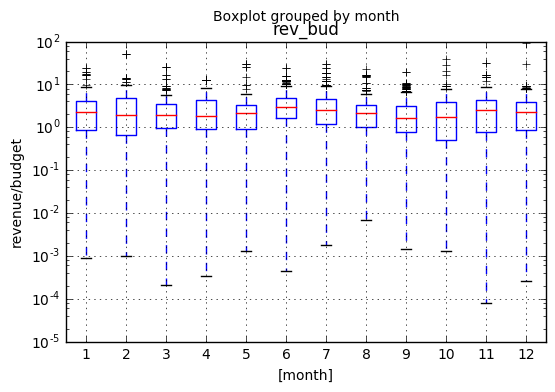

In [20]:
df_g[ df_g['year']>=2012].boxplot(column=['rev_bud'],by = ['month']).set_yscale('log')
plt.ylabel('revenue/budget')
pd.DataFrame(df_g[ df_g['year']>=2012].groupby( ['month'])['rev_bud'].describe() )

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,141.0,2.338559,1.865969,0.000868,1.098617,1.785714,2.610100,7.049736
2,178.0,2.291773,2.038794,0.041493,0.580411,1.852793,3.241140,9.073223
3,186.0,2.237903,2.418569,0.002236,0.712060,1.820182,3.002900,14.196549
4,156.0,2.277358,1.820304,0.000874,0.782810,2.128163,3.278493,8.873339
5,144.0,3.124089,3.724008,0.044336,0.793799,2.210151,4.213446,25.194036
6,151.0,3.115152,3.681299,0.006330,0.707348,1.632331,4.859574,19.067939
7,171.0,3.411353,4.123450,0.003612,1.328336,2.278981,4.409535,33.529412
8,200.0,3.071892,5.130695,0.005509,0.700342,1.727359,3.439703,37.632272
9,292.0,2.312261,5.961132,0.003321,0.334985,1.106496,2.345347,64.672767


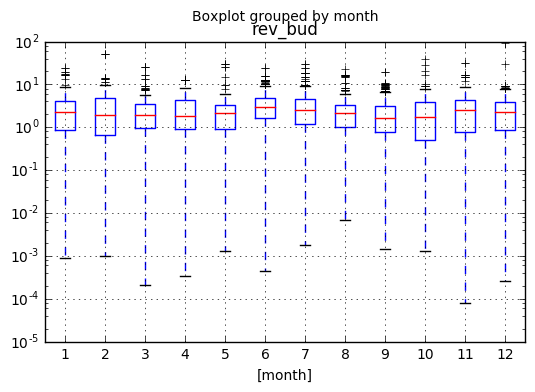

In [22]:
df_g[ df_g['year']>=2012].boxplot(column=['rev_bud'],by = ['month']).set_yscale('log')
pd.DataFrame(df_g[  (df_g['year']<2012)&\
                    (df_g['year']>2007)].groupby( ['month'])['rev_bud'].describe() )

In [23]:
df_top_ses = pd.DataFrame(columns=[['genre','month','rev_bud']]) 
 
Lst_gen = df_g.groupby(['genre'] )['rev_bud'] .quantile(q=0.9)
for i  in Lst_gen.index :
    df_top_ses=df_top_ses.append(df_g[(df_g['rev_bud']>Lst_gen[i]) \
                    & (df_g['genre']==i) & \
                    (df_g['year']>=2012) ][['genre','month','rev_bud']])
 
 

In [24]:
df_top_high = df_top_ses[(df_top_ses['month']>4)&(df_top_ses['month']<8)][['genre','month','rev_bud']]
df_top_high['high']=1
df_top_low = df_top_ses[(df_top_ses['month']<4)|(df_top_ses['month']>8)][['genre','month','rev_bud']]
df_top_low['high']=0
df_top_high=df_top_high.append(df_top_low)

,count,mean,std,min,25%,50%,75%,max
high,,,,,,,,
0,138.0,13.139571,10.773162,6.159913,8.269668,9.216143,14.704681,94.545455
1,80.0,13.853215,6.102572,6.603274,9.914007,11.805980,15.631499,30.381395


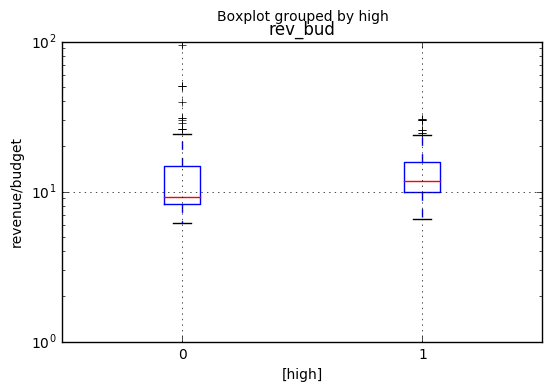

In [26]:
df_top_high .boxplot(column=['rev_bud'],by = ['high']).set_yscale('log')
plt.ylabel('revenue/budget')
pd.DataFrame( df_top_high .groupby( ['high'])['rev_bud'].describe() )    

In [74]:
rvs1 = df_top_high[df_top_high['high']==0]['rev_bud']
rvs2 = df_top_high[df_top_high['high']==1]['rev_bud']
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=-0.54374652081964814, pvalue=0.5871766872586619)

In [68]:
df_top_ses = pd.DataFrame(columns=[['genre','month','rev_bud']]) 
 
Lst_gen = df_g.groupby(['genre'] )['rev_bud'] .quantile(q=0.9)
for i  in Lst_gen.index :
    df_top_ses=df_top_ses.append(df_g[(df_g['rev_bud']>Lst_gen[i]) \
                    & (df_g['genre']==i) &\
                    (df_g['year']>=2012) ][['genre','month','rev_bud']])

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,19.0,13.418823,6.003234,6.159913,8.513934,13.106464,17.272474,24.056673
2,31.0,13.557020,12.537318,6.358782,7.666459,9.120722,13.501948,50.486850
3,16.0,13.265738,6.981119,7.219095,8.223260,9.216143,16.666667,25.904146
4,17.0,10.357470,2.713670,6.077200,7.927628,12.307692,12.353638,12.777778
5,8.0,21.906093,8.862473,9.914007,13.651727,25.597236,29.776209,29.776209
6,44.0,11.560541,3.565022,6.603274,9.876183,11.037308,12.750792,23.888796
7,28.0,15.155167,6.230835,8.277909,9.807692,12.723491,18.658147,30.381395
8,17.0,13.328973,4.587355,7.200000,8.036545,14.810378,16.797291,22.596706
9,22.0,9.975927,3.392691,6.822788,8.358696,9.415840,10.244702,19.690012


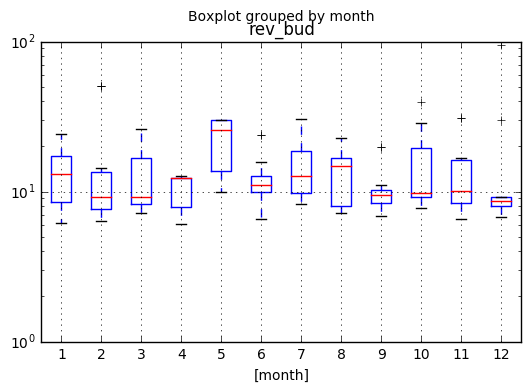

In [69]:
df_top_ses .boxplot(column=['rev_bud'],by = ['month']).set_yscale('log')
pd.DataFrame( df_top_ses .groupby( ['month'])['rev_bud'].describe() )  

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,5.0,6.795468,0.182573,6.550836,6.715648,6.830561,6.830561,7.049736
2,7.0,8.266204,0.571840,7.610619,8.026591,8.026591,8.549907,9.073223
3,4.0,14.196549,0.000000,14.196549,14.196549,14.196549,14.196549,14.196549
4,3.0,8.027643,1.464789,6.336250,7.604795,8.873339,8.873339,8.873339
5,13.0,11.990064,6.048473,7.722002,8.895524,9.154572,10.809875,25.194036
6,18.0,11.248659,3.770808,7.934376,8.946310,9.852076,10.271932,19.067939
7,15.0,12.512237,8.736994,4.409535,8.175702,9.915957,11.231862,33.529412
8,14.0,16.724800,12.075861,6.125000,8.033276,12.508099,16.982921,37.632272
9,12.0,21.861931,21.189197,7.450666,9.242318,9.635741,27.614103,64.672767


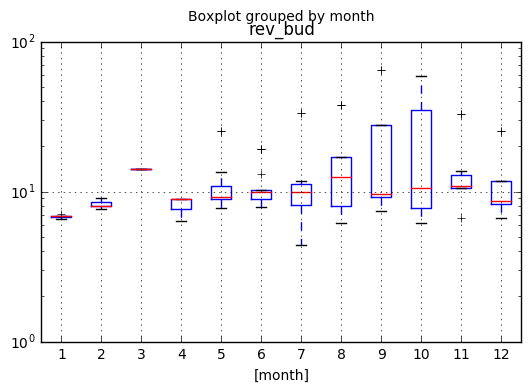

In [61]:
df_top_ses_5 .boxplot(column=['rev_bud'],by = ['month']).set_yscale('log')
pd.DataFrame( df_top_ses_5 .groupby( ['month'])['rev_bud'].describe() )         
 

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,758.0,3.129433,5.973080,5.217391e-07,0.573969,1.615591,3.594282,55.589466
2,880.0,3.476277,6.549526,5.111111e-06,0.640164,1.873089,3.940161,73.748809
3,1015.0,3.450389,7.455968,2.100833e-04,0.767787,1.797974,3.435318,90.893591
4,930.0,3.038910,5.733444,3.286667e-04,0.746623,1.736225,3.621434,75.520507
5,979.0,3.557239,5.573722,1.289474e-03,0.954313,2.210151,4.266448,70.490728
6,1188.0,3.951946,5.744249,4.500000e-04,1.306498,2.656659,4.688860,67.236286
7,1099.0,4.639337,12.277976,1.747200e-03,1.175947,2.433605,4.492356,190.666667
8,1146.0,3.376267,7.227363,6.582857e-04,0.787044,1.716393,3.444444,94.076932
9,1409.0,2.569792,5.178524,7.500000e-07,0.441758,1.256960,2.799420,65.640701


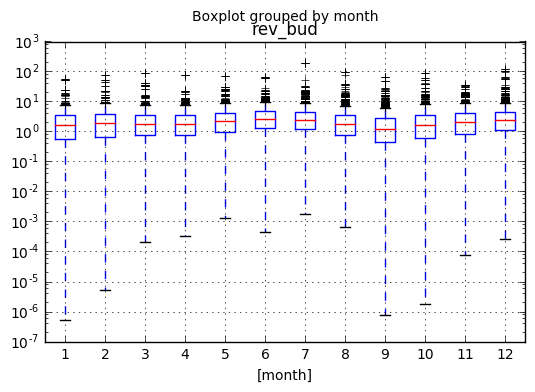

In [30]:
df_g
df_g.boxplot(column=['rev_bud'],by = ['month']).set_yscale('log')
pd.DataFrame(df_g.groupby( ['month'])['rev_bud'].describe() )

,rev_bud
count,3.995900e+04
mean,3.294136e+00
std,6.387666e+00
min,5.217391e-07
25%,7.865264e-01
50%,1.899343e+00
75%,3.662501e+00
max,1.906667e+02


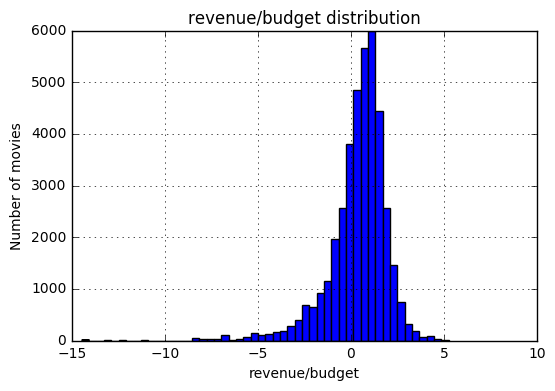

In [177]:
 
ax =  log (df1['rev_bud']).hist( bins=50) 
ax.set_ylabel('Number of movies')
ax.set_xlabel('revenue/budget')
ax.set_title('revenue/budget distribution')
pd.DataFrame(df1['rev_bud'].describe())

In [ ]:
df1

,budget
count,4.916000e+03
mean,3.188028e+07
std,4.110848e+07
min,1.000000e+00
25%,5.500000e+06
50%,1.700000e+07
75%,4.000000e+07
max,3.800000e+08


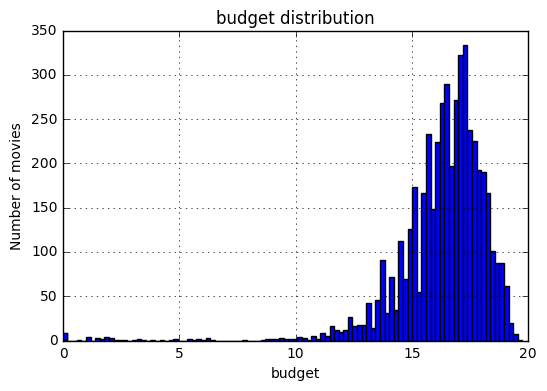

In [7]:
ax = log(df1['budget']).hist( bins=100) 
ax.set_ylabel('Number of movies')
ax.set_xlabel('budget')
ax.set_title('budget distribution')
pd.DataFrame(df1['budget'].describe())

,budget
count,5.374000e+03
mean,3.112579e+07
std,4.017839e+07
min,1.000000e+00
25%,5.136250e+06
50%,1.700000e+07
75%,4.000000e+07
max,3.800000e+08


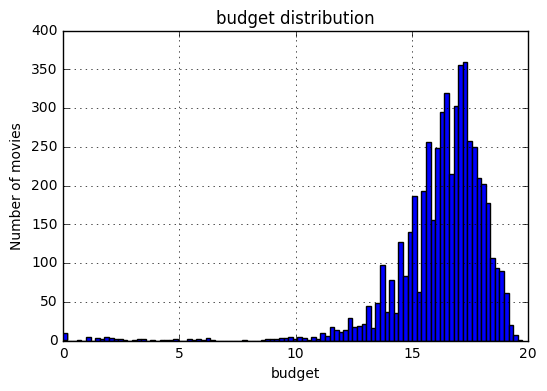

In [23]:
 
df1=df[df['revenue']>0][['revenue','vote_average','budget','popularity']]

df1=df1[df1['vote_average']>0][['revenue','vote_average','budget','popularity']]

df1['budget']=df1[pd.to_numeric(df1['budget'], errors='coerce').notnull()] ['budget']
 
df1['budget'] = pd.to_numeric(df1['budget'])
dfn = df1[df1['budget']>0][['revenue','vote_average','budget','popularity']]
ax =  log (dfn['budget']).hist( bins=100) 
ax.set_ylabel('Number of movies')
ax.set_xlabel('budget')
ax.set_title('budget distribution')
pd.DataFrame(dfn['budget'].describe())

In [24]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5374 entries, 0 to 45422
Data columns (total 4 columns):
revenue         5374 non-null float64
vote_average    5374 non-null float64
budget          5374 non-null int64
popularity      5374 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 209.9+ KB


,0
count,4.916000e+03
mean,6.989517e+02
std,2.958894e+04
min,8.066869e-08
25%,2.267420e-01
50%,4.621860e-01
75%,1.140391e+00
max,1.916667e+06


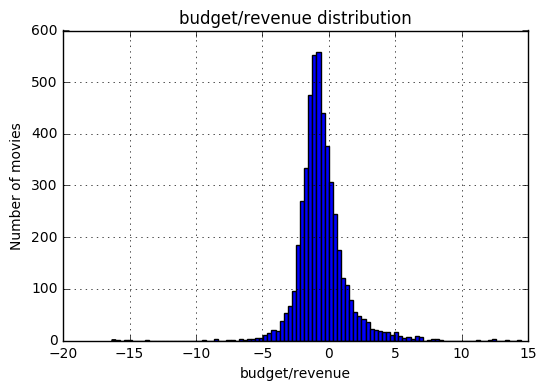

In [8]:
ax = (log(df1['budget']/df1['revenue'])).hist( bins=100) 
ax.set_ylabel('Number of movies')
ax.set_xlabel('budget/revenue')
ax.set_title('budget/revenue distribution')
pd.DataFrame((df1['budget']/df1['revenue']).describe())

,vote_average
count,4916.000000
mean,6.448881
std,0.722010
min,5.100000
25%,5.900000
50%,6.400000
75%,7.000000
max,9.100000


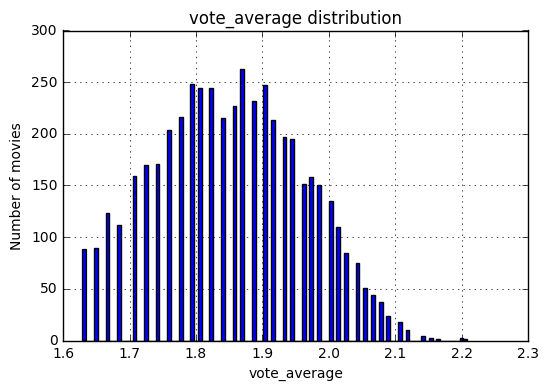

In [9]:
 
ax = (log(df1['vote_average'] )).hist( bins=100) 
ax.set_ylabel('Number of movies')
ax.set_xlabel('vote_average')
ax.set_title('vote_average distribution')
pd.DataFrame((df1['vote_average'] ).describe())

,popularity
count,4916.000000
mean,10.151663
std,14.331964
min,0.000001
25%,5.815031
50%,8.648060
75%,11.954068
max,547.488298


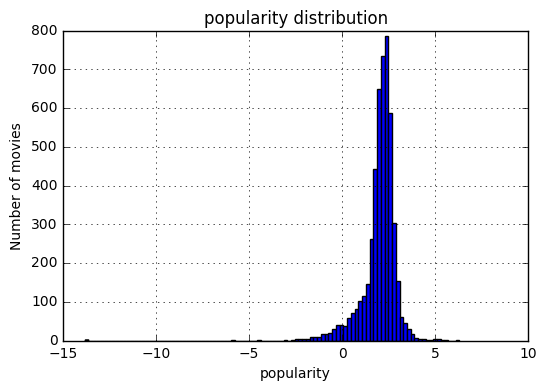

In [10]:
 
ax = (log(df1['popularity'] )).hist( bins=100) 
ax.set_ylabel('Number of movies')
ax.set_xlabel('popularity')
ax.set_title('popularity distribution')
pd.DataFrame((df1['popularity'] ).describe())


,revenue,vote_average,budget,popularity
count,4.916000e+03,4916.000000,4.916000e+03,4916.000000
mean,9.608642e+07,6.448881,3.188028e+07,10.151663
std,1.720424e+08,0.722010,4.110848e+07,14.331964
min,1.000000e+00,5.100000,1.000000e+00,0.000001
25%,8.000000e+06,5.900000,5.500000e+06,5.815031
50%,3.300690e+07,6.400000,1.700000e+07,8.648060
75%,1.077226e+08,7.000000,4.000000e+07,11.954068
max,2.787965e+09,9.100000,3.800000e+08,547.488298


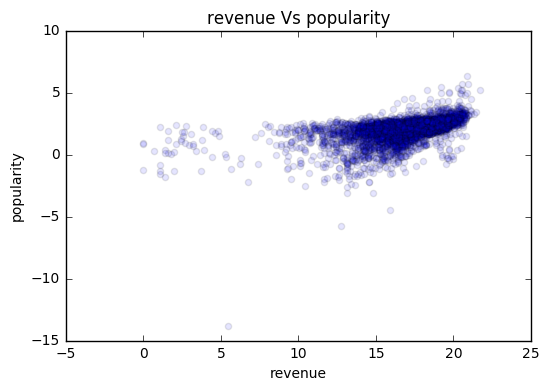

In [12]:
 
plt.scatter(log(df1['revenue']), log(df1['popularity']) , alpha = 0.1) 
#plt.set_xscale('log')
plt.xlabel('revenue')
plt.ylabel('popularity')
plt.title('revenue Vs popularity')
df1.describe()

,revenue,vote_average,budget,popularity
count,4.916000e+03,4916.000000,4.916000e+03,4916.000000
mean,9.608642e+07,6.448881,3.188028e+07,10.151663
std,1.720424e+08,0.722010,4.110848e+07,14.331964
min,1.000000e+00,5.100000,1.000000e+00,0.000001
25%,8.000000e+06,5.900000,5.500000e+06,5.815031
50%,3.300690e+07,6.400000,1.700000e+07,8.648060
75%,1.077226e+08,7.000000,4.000000e+07,11.954068
max,2.787965e+09,9.100000,3.800000e+08,547.488298


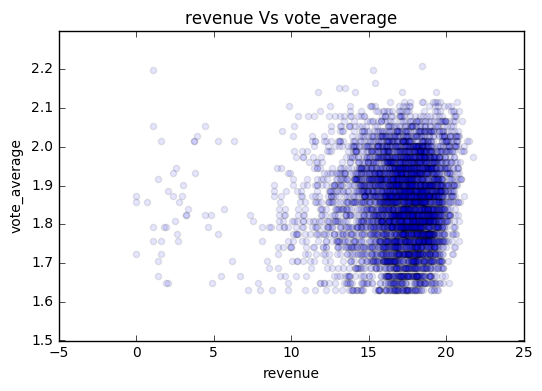

In [14]:
plt.scatter(log(df1['revenue']), log(df1['vote_average']) , alpha = 0.1) 
#plt.set_xscale('log')
plt.xlabel('revenue')
plt.ylabel('vote_average')
plt.title('revenue Vs vote_average')
df1.describe()

,revenue,vote_average,budget,popularity
count,4.916000e+03,4916.000000,4.916000e+03,4916.000000
mean,9.608642e+07,6.448881,3.188028e+07,10.151663
std,1.720424e+08,0.722010,4.110848e+07,14.331964
min,1.000000e+00,5.100000,1.000000e+00,0.000001
25%,8.000000e+06,5.900000,5.500000e+06,5.815031
50%,3.300690e+07,6.400000,1.700000e+07,8.648060
75%,1.077226e+08,7.000000,4.000000e+07,11.954068
max,2.787965e+09,9.100000,3.800000e+08,547.488298


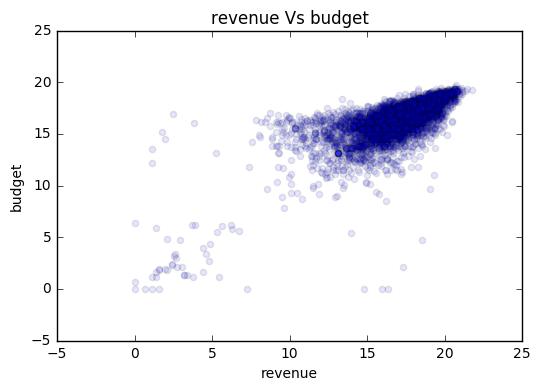

In [15]:
plt.scatter(log(df1['revenue']), log(df1['budget']) , alpha = 0.1) 
#plt.set_xscale('log')
plt.xlabel('revenue')
plt.ylabel('budget')
plt.title('revenue Vs budget')
df1.describe()

0           21.9469
1           17.0155
3           3.85949
5           17.9249
8           5.23158
9            14.686
10          6.31844
13            5.092
14          7.28448
15          10.1374
16          10.6732
17          9.02659
18          8.20545
19          7.33791
20          12.6696
22          11.0659
24           10.332
26          8.68132
28          9.82242
31          12.2973
33          14.4048
35          6.89132
43          10.8701
44          10.4485
45          4.48596
46          18.4574
47          13.2801
49          16.3025
51          15.8991
68          14.5696
            ...    
43908      1.188935
43944      0.471086
43993      0.884241
43999      1.900502
44003      0.824156
44009     36.631519
44021       6.55207
44103      0.414793
44129      8.966129
44152      0.209434
44249       0.75684
44274    146.161786
44282     20.214579
44337     15.262706
44426      0.236466
44557      1.557671
44580      3.003526
44632     14.455104
44678     30.938854
